<a href="https://colab.research.google.com/github/barath220904/CODSOFT/blob/main/Handwritten_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Padded stroke data shape: (1000, 100, 3)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 99, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 99, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 99, 3)          │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,187 (457.76 KB)

 Trainable params: 117,187 (457.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 539ms/step - loss: 2.1524 - val_loss: 2.0193
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step - loss: 2.0731 - val_loss: 2.0078
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 442ms/step - loss: 2.0494 - val_loss: 2.0061
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - loss: 2.0405 - val_loss: 2.0044
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 374ms/step - loss: 2.0527 - val_loss: 2.0035
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 377ms/step - loss: 2.0396 - val_loss: 2.0031
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 416ms/step - loss: 2.0403 - val_loss: 2.0024
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - loss: 2.0437 - val_loss: 2.0018
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - loss: 2.0628 - val_loss: 2.0008
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 446ms/step - loss: 2.0496 - val_loss: 2.0021
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - loss: 2.0438 - val_loss: 2.0007
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms

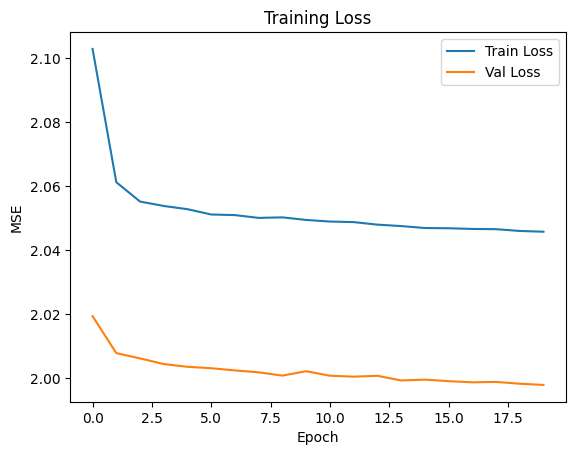

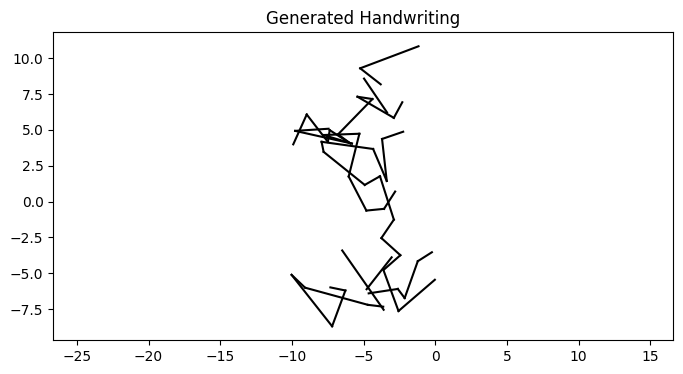

In [1]:
# 📝 Handwritten Text Generation using LSTM

# 📦 Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import random
import warnings
warnings.filterwarnings('ignore')

# 📂 Step 2: Simulate Stroke Dataset
# Each sequence: [Δx, Δy, pen_status]
def generate_stroke_sequence(length=100):
    strokes = []
    x, y = 0, 0
    for _ in range(length):
        dx = np.random.randn() * 2
        dy = np.random.randn() * 2
        pen = 1 if random.random() > 0.1 else 0
        x += dx
        y += dy
        strokes.append([dx, dy, pen])
    return strokes

sequences = [generate_stroke_sequence(random.randint(50, 100)) for _ in range(1000)]
max_len = max(len(seq) for seq in sequences)
padded = pad_sequences(sequences, maxlen=max_len, dtype='float32', padding='post')
print("✅ Padded stroke data shape:", padded.shape)

# 🔀 Step 3: Prepare Data
X = padded[:, :-1, :]
y = padded[:, 1:, :]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 🧠 Step 4: Build the Model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(3))  # Δx, Δy, pen status
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# 🎯 Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

# 📈 Step 6: Plot Training Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

# ✍️ Step 7: Generate Handwriting
def generate_handwriting(seed_sequence, length=100):
    output = list(seed_sequence)
    for _ in range(length):
        inp = np.array(output[-X.shape[1]:]).reshape(1, X.shape[1], 3)
        pred = model.predict(inp, verbose=0)[0, -1]
        output.append(pred)
    return np.array(output)

seed = X_train[0]
generated = generate_handwriting(seed)

# Plot the generated handwriting
points = np.cumsum(generated[:, :2], axis=0)
pen_state = generated[:, 2]

plt.figure(figsize=(8, 4))
for i in range(1, len(points)):
    if pen_state[i] > 0.5:
        plt.plot([points[i-1, 0], points[i, 0]], [points[i-1, 1], points[i, 1]], color='black')
plt.title("Generated Handwriting")
plt.axis('equal')
plt.show()
